In [1]:
import pandas as pd

# For loading data as Pandas Dataframe
import numpy as np

# For performing Matrix Calculations
import seaborn as sns

# For visualizing statistical results
import scipy.stats as s

# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For evaluating the performance of the model

In [9]:
data = pd.read_excel("fitur_with_resprate.xlsx")
data

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Respiratory Rate,Label
0,80.568431,222.274826,368.223786,195.355517,93.150685,0.047852,0.304688,0.005376,260.373536,173.951093,0.668083,17.582506,0
1,81.446682,226.661296,381.289425,188.988957,94.557823,0.063477,0.300781,0.006305,269.612314,173.348284,0.642954,18.107391,0
2,79.320992,215.497094,351.052520,197.086881,93.750000,0.041016,0.295898,0.006535,248.231445,176.696145,0.711820,17.138070,0
3,83.278523,235.231443,399.870160,171.497801,96.969697,0.046875,0.322266,0.007597,282.749667,174.284190,0.616390,19.223684,0
4,81.458408,235.122362,396.694950,188.722372,97.260274,0.051758,0.328125,0.008252,280.505539,178.458196,0.636202,18.648022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,200.387542,1018.682901,1066.921911,989.214928,93.243243,0.040039,0.150391,49.101431,750.012748,746.971950,0.995946,11.054482,0
1799,82.918378,69.268236,16.409353,11.457858,1.226994,0.047852,0.172852,49.525937,11.602552,97.246573,8.381482,15.119709,1
1800,90.657909,65.795606,9.850426,5.964804,0.000000,0.052734,0.180664,50.408359,6.963794,92.741201,13.317626,15.286906,0
1801,80.031242,72.801562,17.842106,11.082467,0.318471,0.045898,0.151367,51.246217,12.608152,101.761822,8.071113,15.134702,1


In [10]:
data_columns = data.columns
data_columns

Index(['HR', 'SDNN', 'RMSSD', 'SDSD', 'pNN50', 'LF', 'HF', 'LF/HF', 'SD1',
       'SD2', 'SD_ratio', 'Respiratory Rate', 'Label'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                1803 non-null   float64
 1   SDNN              1803 non-null   float64
 2   RMSSD             1803 non-null   float64
 3   SDSD              1803 non-null   float64
 4   pNN50             1803 non-null   float64
 5   LF                1803 non-null   float64
 6   HF                1803 non-null   float64
 7   LF/HF             1803 non-null   float64
 8   SD1               1803 non-null   float64
 9   SD2               1803 non-null   float64
 10  SD_ratio          1803 non-null   float64
 11  Respiratory Rate  1803 non-null   float64
 12  Label             1803 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 183.2 KB


In [12]:
data_copy = data.replace(to_replace=["0", "1"], value=[0, 1], inplace=False)
data_copy

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Respiratory Rate,Label
0,80.568431,222.274826,368.223786,195.355517,93.150685,0.047852,0.304688,0.005376,260.373536,173.951093,0.668083,17.582506,0
1,81.446682,226.661296,381.289425,188.988957,94.557823,0.063477,0.300781,0.006305,269.612314,173.348284,0.642954,18.107391,0
2,79.320992,215.497094,351.052520,197.086881,93.750000,0.041016,0.295898,0.006535,248.231445,176.696145,0.711820,17.138070,0
3,83.278523,235.231443,399.870160,171.497801,96.969697,0.046875,0.322266,0.007597,282.749667,174.284190,0.616390,19.223684,0
4,81.458408,235.122362,396.694950,188.722372,97.260274,0.051758,0.328125,0.008252,280.505539,178.458196,0.636202,18.648022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,200.387542,1018.682901,1066.921911,989.214928,93.243243,0.040039,0.150391,49.101431,750.012748,746.971950,0.995946,11.054482,0
1799,82.918378,69.268236,16.409353,11.457858,1.226994,0.047852,0.172852,49.525937,11.602552,97.246573,8.381482,15.119709,1
1800,90.657909,65.795606,9.850426,5.964804,0.000000,0.052734,0.180664,50.408359,6.963794,92.741201,13.317626,15.286906,0
1801,80.031242,72.801562,17.842106,11.082467,0.318471,0.045898,0.151367,51.246217,12.608152,101.761822,8.071113,15.134702,1


In [13]:
corr_df = abs(data_copy.corr())
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Respiratory Rate,Label
HR,1.000000,0.091851,0.076185,0.128672,0.167694,0.079143,0.178696,0.171322,0.075775,0.058685,0.200262,0.135922,0.056578
SDNN,0.091851,1.000000,0.911977,0.920037,0.712617,0.047388,0.056528,0.009551,0.911774,0.961208,0.166342,0.068408,0.011721
RMSSD,0.076185,0.911977,1.000000,0.955753,0.806641,0.098851,0.092454,0.148321,0.999998,0.786218,0.405158,0.037822,0.159025
SDSD,0.128672,0.920037,0.955753,1.000000,0.660478,0.104842,0.024531,0.116890,0.955594,0.827501,0.385582,0.017608,0.131782
pNN50,0.167694,0.712617,0.806641,0.660478,1.000000,0.139691,0.161870,0.239781,0.806902,0.607592,0.425503,0.064886,0.151320
LF,0.079143,0.047388,0.098851,0.104842,0.139691,1.000000,0.020708,0.201887,0.098950,0.032150,0.219868,0.072728,0.273371
HF,0.178696,0.056528,0.092454,0.024531,0.161870,0.020708,1.000000,0.229995,0.092569,0.136125,0.328899,0.333663,0.084983
LF/HF,0.171322,0.009551,0.148321,0.116890,0.239781,0.201887,0.229995,1.000000,0.148747,0.021934,0.626315,0.141331,0.336571
SD1,0.075775,0.911774,0.999998,0.955594,0.806902,0.098950,0.092569,0.148747,1.000000,0.786177,0.405334,0.038039,0.159079
SD2,0.058685,0.961208,0.786218,0.827501,0.607592,0.032150,0.136125,0.021934,0.786177,1.000000,0.048916,0.118012,0.069624


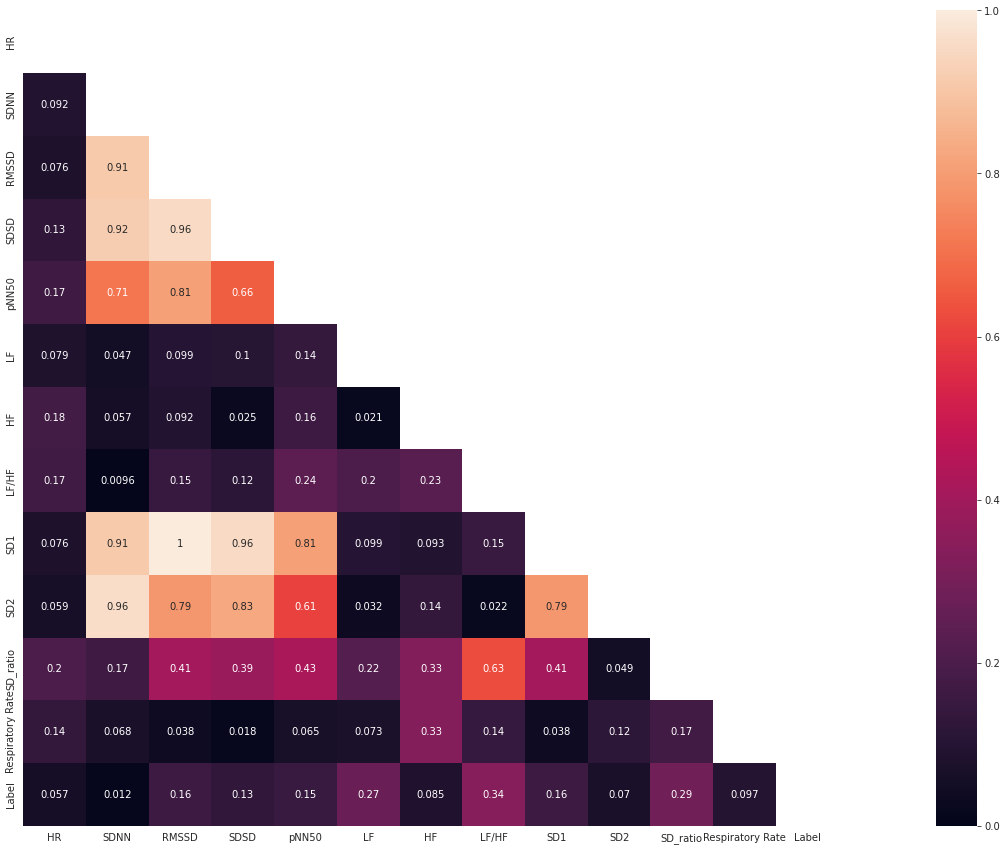

In [14]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = (
    True  # True = generate a mask of lower triangle of matrix
)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35, 15))
    sns.heatmap(data=corr_df, vmin=0, vmax=1, mask=mask, square=True, annot=True)

In [15]:
strong_relation_features = (
    pd.Series(corr_df["Label"]).nlargest(n=9).iloc[1:]
)  # nlargest(n=9)==> take 8 features
strong_relation_features

LF/HF               0.336571
SD_ratio            0.290917
LF                  0.273371
SD1                 0.159079
RMSSD               0.159025
pNN50               0.151320
SDSD                0.131782
Respiratory Rate    0.097453
Name: Label, dtype: float64